In [1]:
import numpy as np
import anndata
import pandas as pd
import scanpy as sc
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import os
from moscot.problems.time._lineage import TemporalProblem
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.verbosity = 0

In [2]:
sns.set_style('whitegrid')

sc.set_figure_params(dpi=200)

In [3]:
palette=sns.color_palette()

In [5]:
Path="/home/mgander/mouse_atlas/data/WOT"
days=list(pd.read_csv(f'{Path}/Representations/obs/days.csv')['0'])

In [6]:
adata=sc.read(f"{Path}/reprogramming_schiebinger_serum.h5ad")
adata.obs['day']=adata.obs['day'].astype('float')
adata=adata[adata.obs['day']>7.9].copy()
adata.obs['day']=adata.obs['day'].astype('category')
days=sorted(set(adata.obs['day']))

## Load and combine the growth rates

In [143]:
frames1=[]
for i in range(len(days)-1):
    ts0=days[i]
    df0=pd.read_pickle(f'{Path}/growth_rates/moscot/{ts0}.pkl')
    df1=pd.read_pickle(f'{Path}/growth_rates/TOME/{ts0}.pkl')
    
    frames1.append(df0.join(df1))

In [144]:
def accumulate_growth_rates_for_each_cell_set(df, method):
    
    dfs=df[df['major_cell_sets'].astype('str')!='nan'].copy()
    dfsr=dfs[[f'{method}_growth_rates', 'scores', 'major_cell_sets']].groupby('major_cell_sets').mean()
    value_count_df=dfs['major_cell_sets'].value_counts()

    D_n={value_count_df.index[i]:value_count_df.values[i] for i in range(len(value_count_df))}
    dfsr['n']=[D_n[a] for a in dfsr.index]
    dfsr['method']=method
    dfsr['growth_rates']=dfsr[f'{method}_growth_rates']
    return(dfsr)

In [152]:
method='moscot'
frames0=[]

for df in frames1:
    frames0.append(accumulate_growth_rates_for_each_cell_set(df, method=method))
dfn=pd.concat(frames0)
dfn['cell_sets']=dfn.index
dfn.index=range(len(dfn))
dfn=dfn.sort_values('cell_sets')

dfm=dfn.copy()


method='TOME'

frames0=[]

for df in frames1:
    frames0.append(accumulate_growth_rates_for_each_cell_set(df, method=method))
dfn=pd.concat(frames0)
dfn['cell_sets']=dfn.index
dfn.index=range(len(dfn))
dfn=dfn.sort_values('cell_sets')

dft=dfn.copy()

# Plot and accumulate

## moscot

PearsonRResult(statistic=0.3861042082814817, pvalue=0.0001439631396150478)
SignificanceResult(statistic=0.3365750658878288, pvalue=0.0010364575037029998)


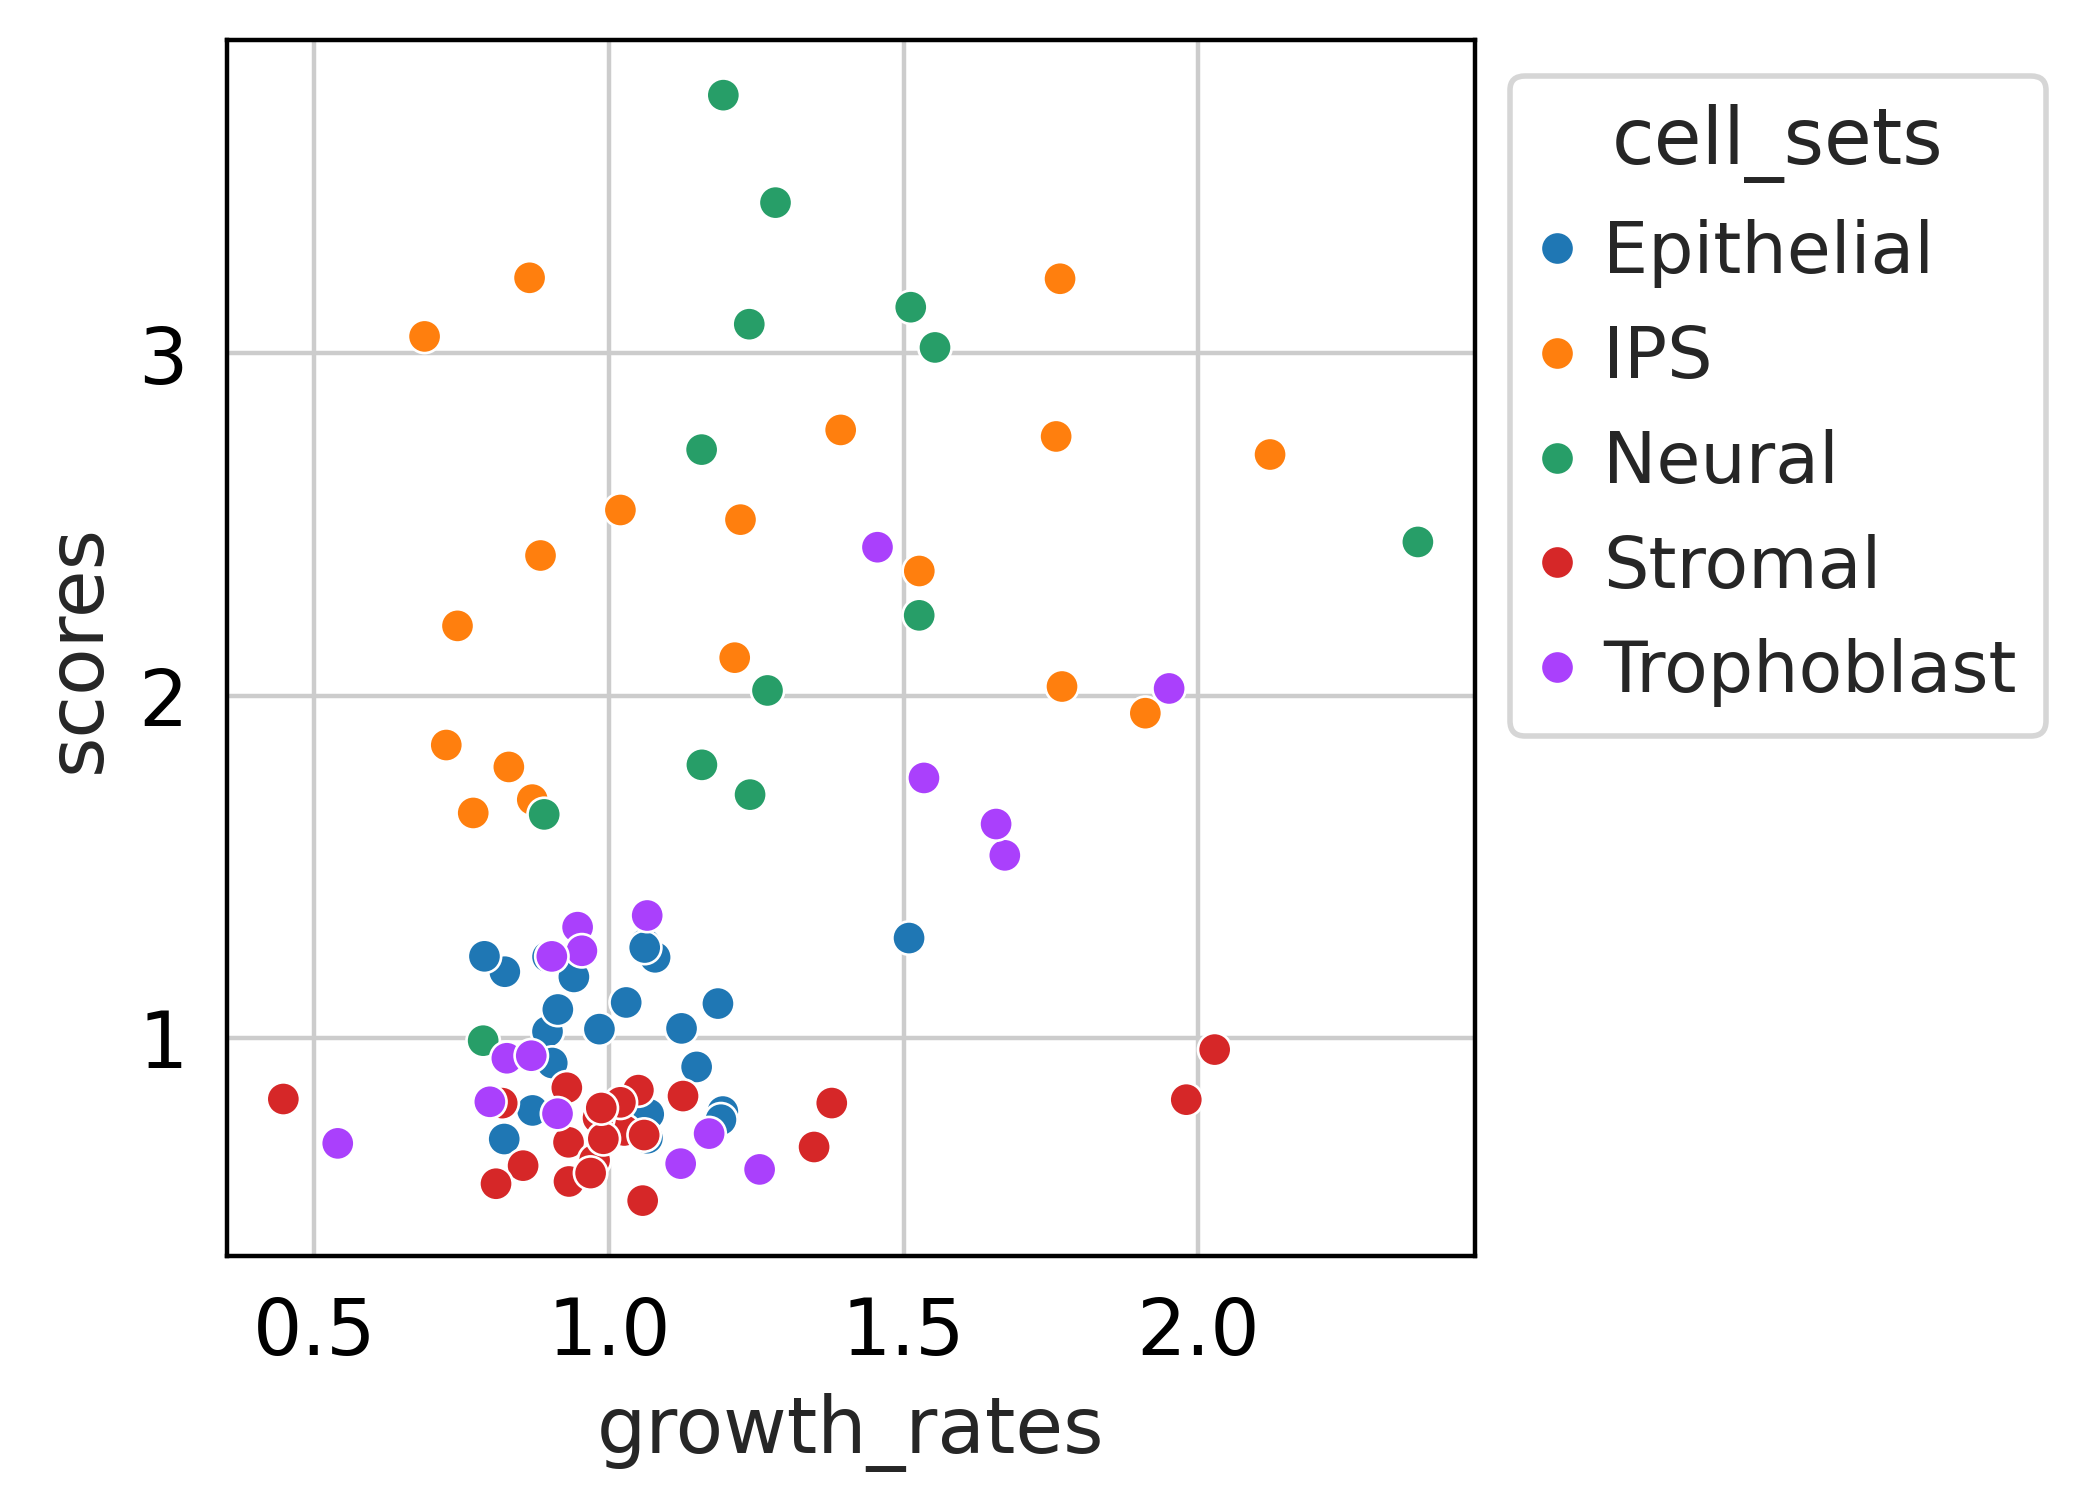

In [153]:
dfns=dfm[dfm['n']>0].copy()
ax = sns.scatterplot(data=dfns, x='growth_rates', y='scores', hue='cell_sets')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
print(scipy.stats.pearsonr(dfns['growth_rates'], dfns['scores']))
print(scipy.stats.spearmanr(dfns['growth_rates'], dfns['scores']))

PearsonRResult(statistic=0.4766675533764489, pvalue=0.000118025315719927)
SignificanceResult(statistic=0.24017782717421512, pvalue=0.06453987994317945)


(0.4, 3.0)

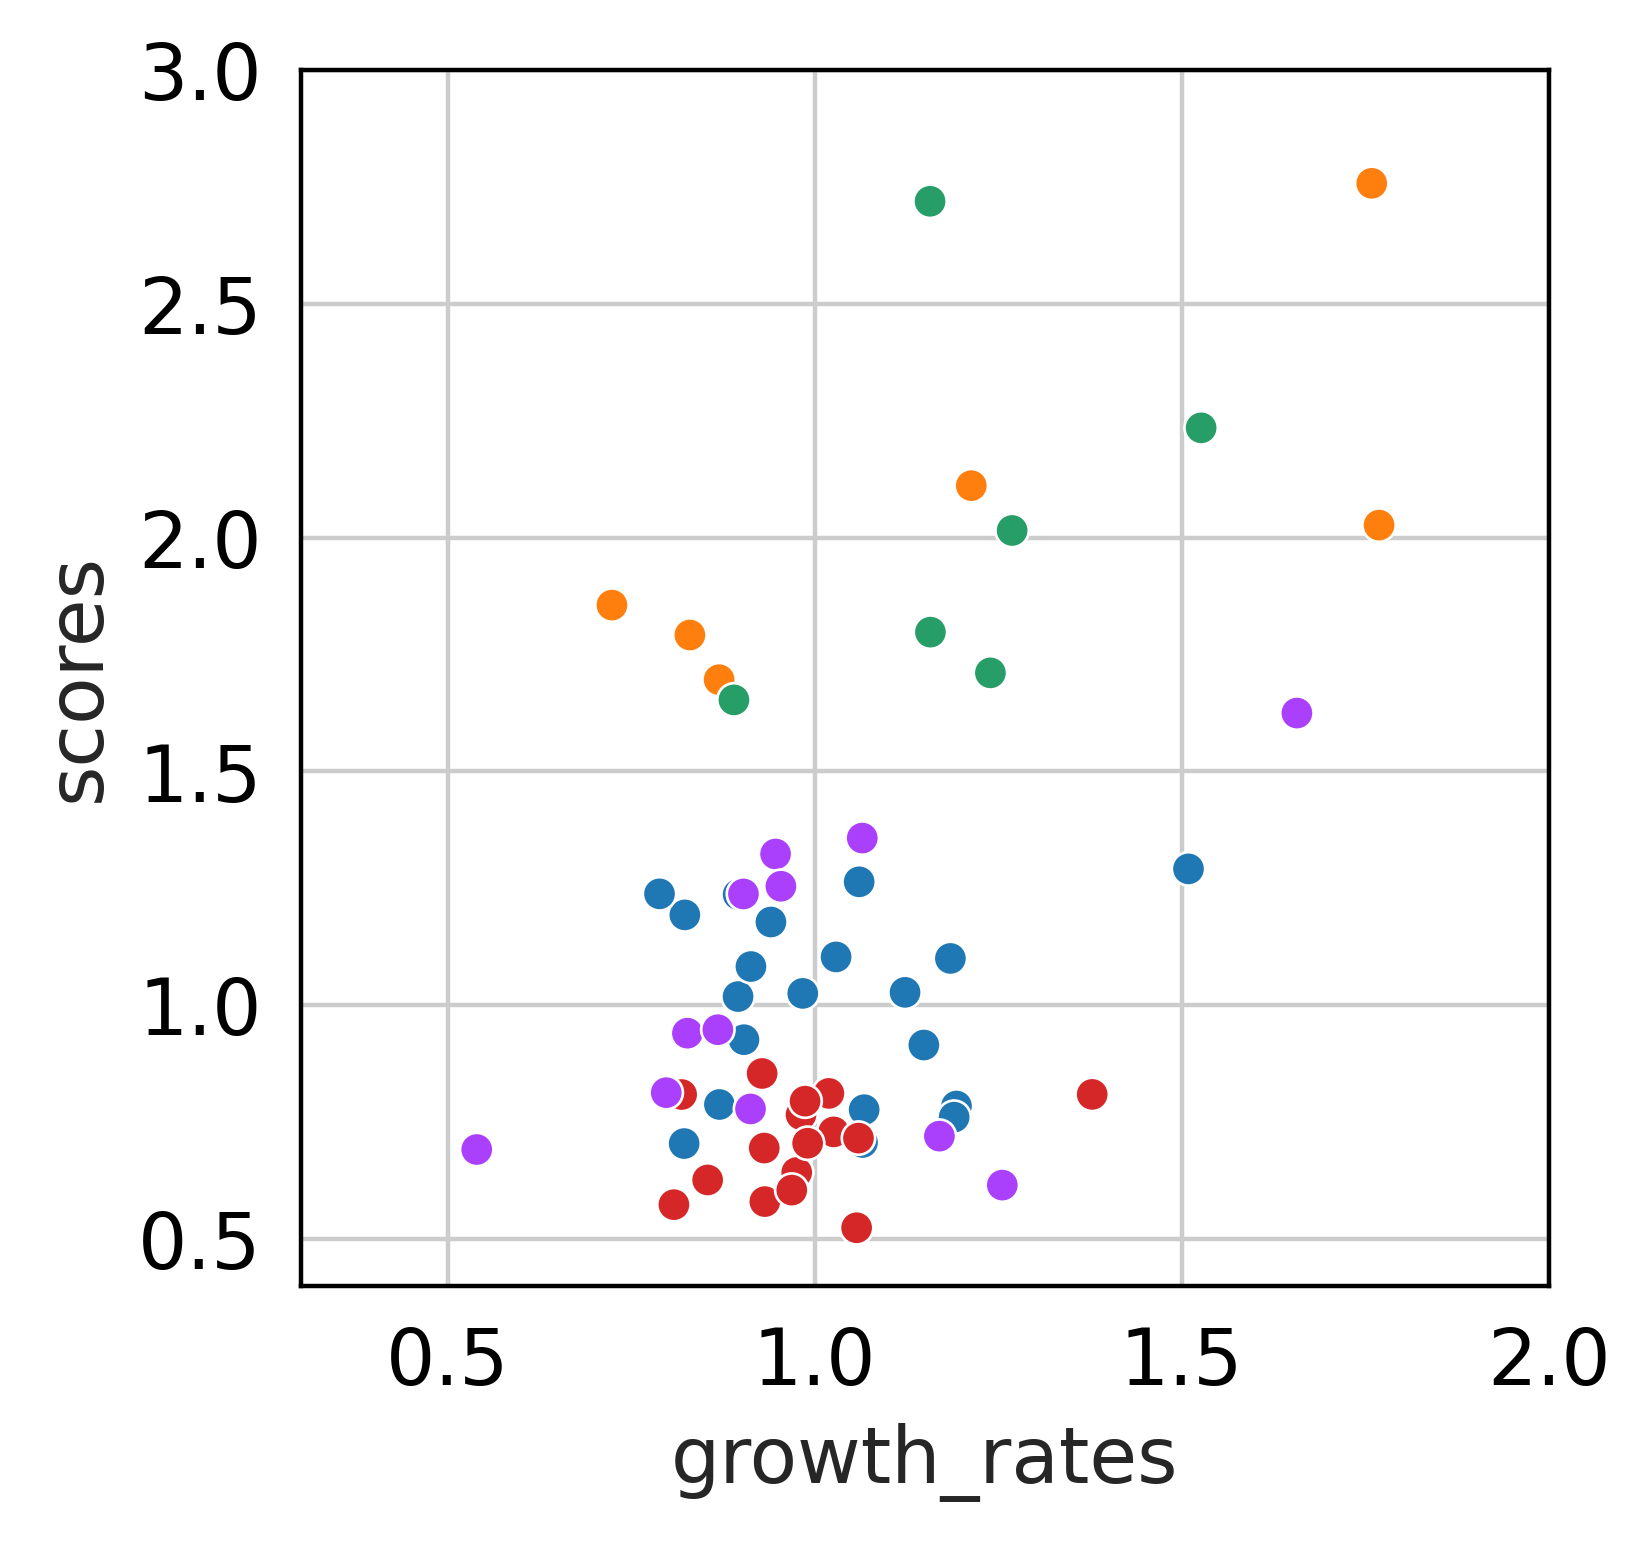

In [154]:
# moscot
dfns=dfm[dfm['n']>200].copy()
ax = sns.scatterplot(data=dfns, x='growth_rates', y='scores', hue='cell_sets')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
print(scipy.stats.pearsonr(dfns['growth_rates'], dfns['scores']))
print(scipy.stats.spearmanr(dfns['growth_rates'], dfns['scores']))
plt.legend([],[], frameon=False)
plt.xlim(0.3,2)
plt.ylim(0.4,3)

## TOME

PearsonRResult(statistic=0.13991346800691523, pvalue=0.1834499244322284)
SignificanceResult(statistic=0.17717870517181325, pvalue=0.09110482756279009)


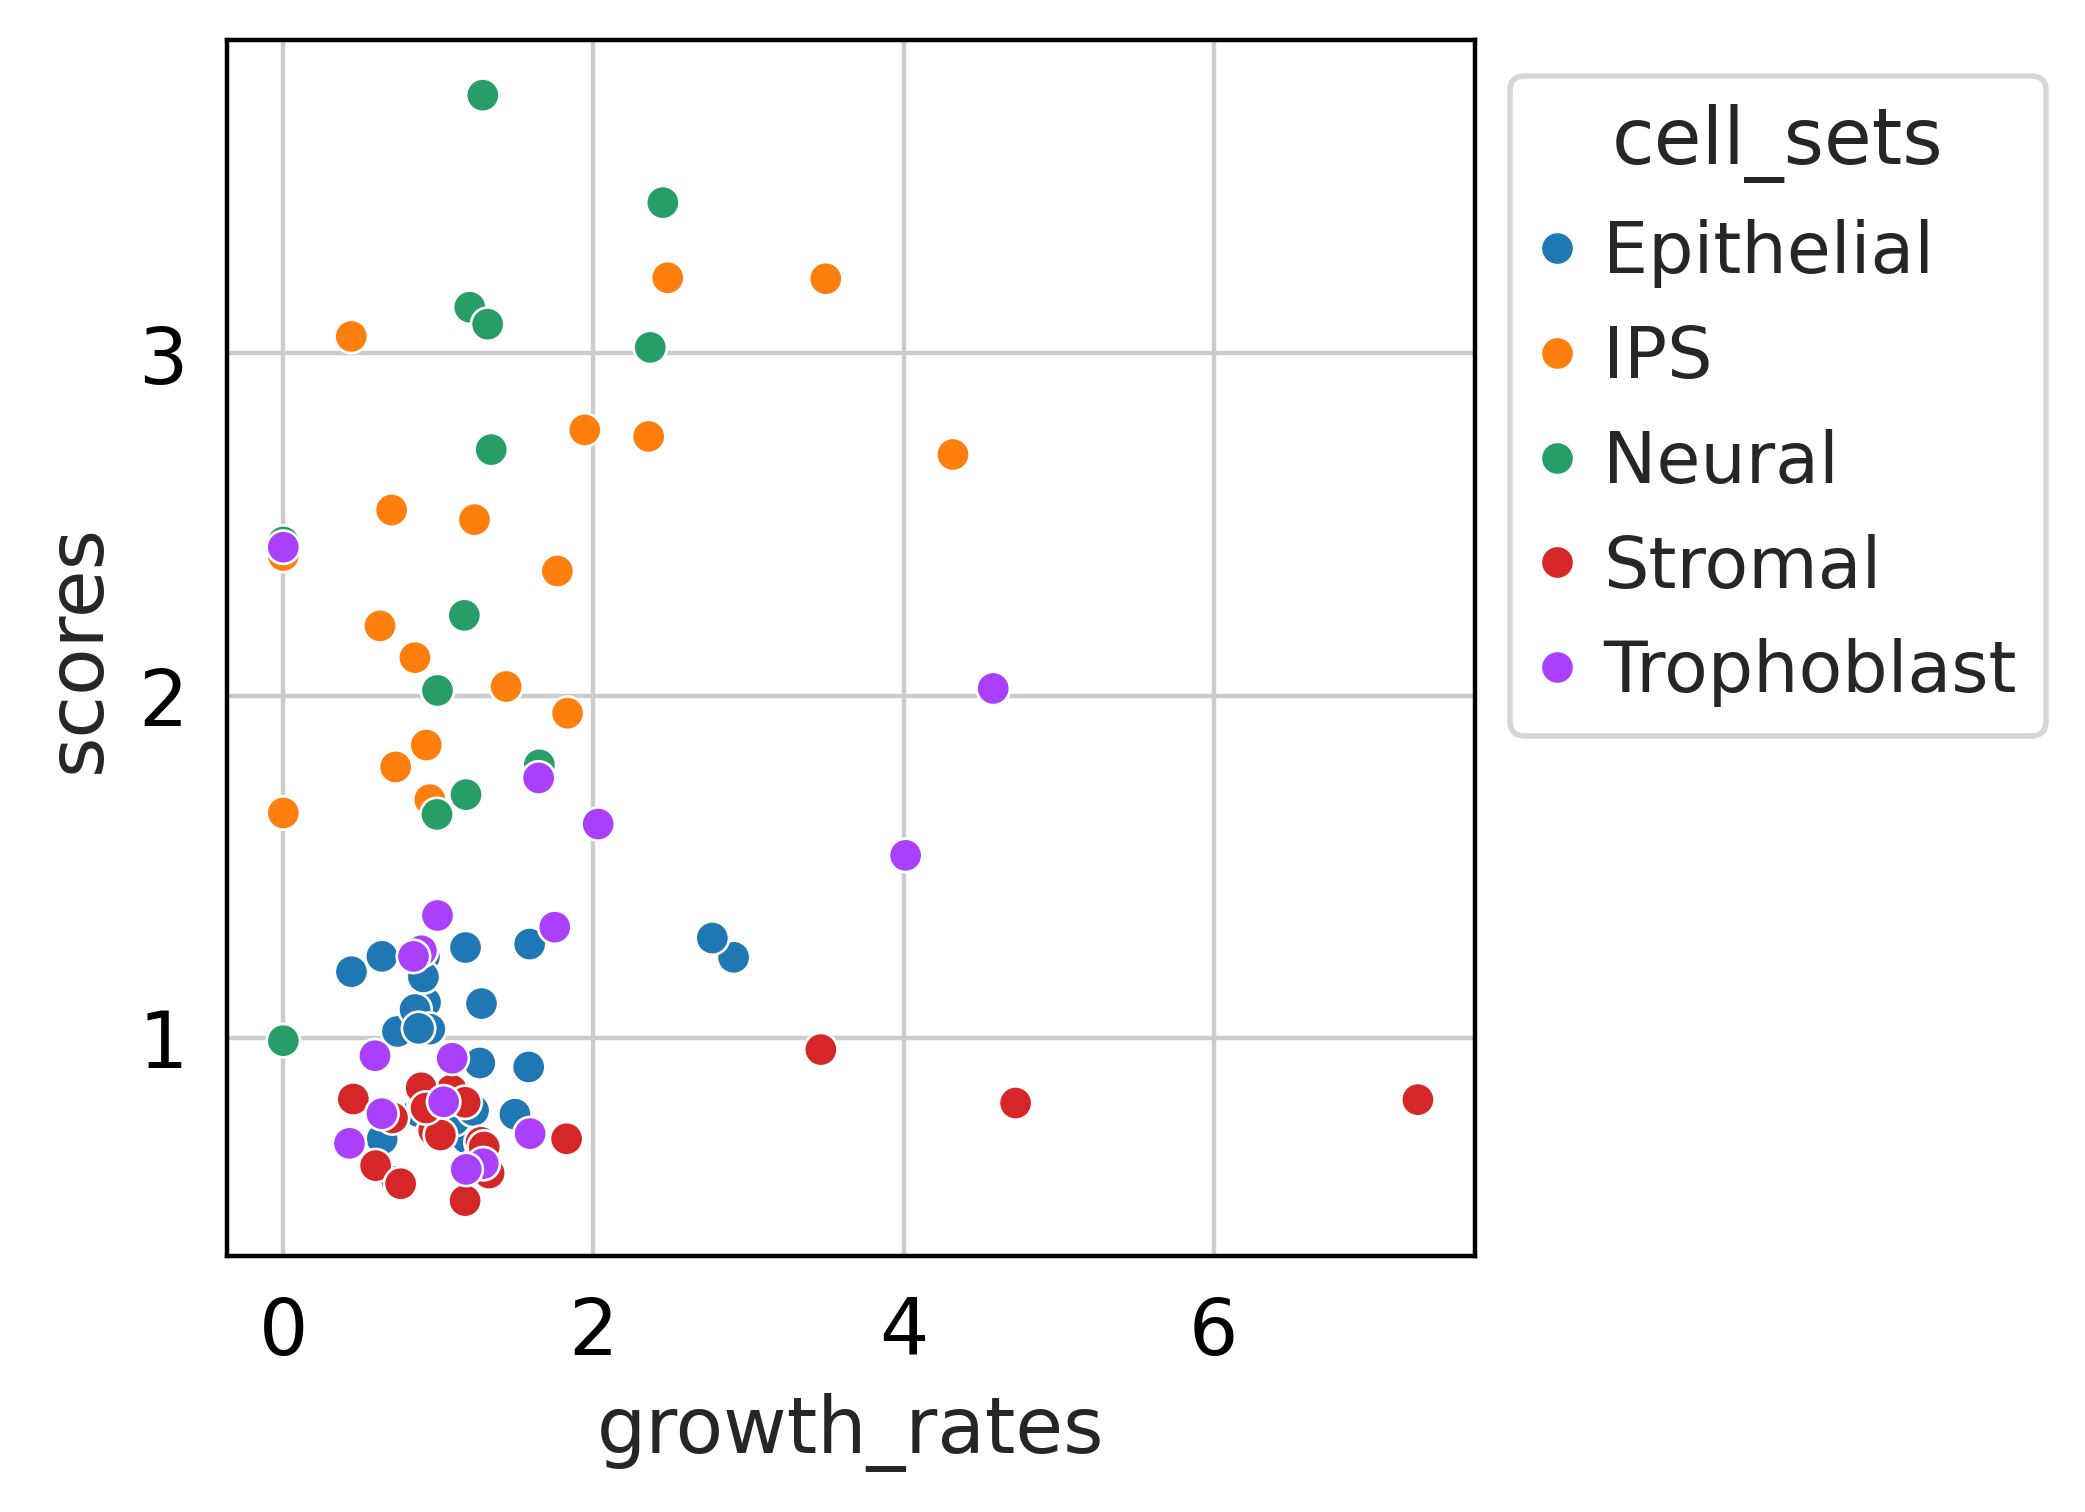

In [155]:
dfns=dft[dft['n']>0].copy()
ax = sns.scatterplot(data=dfns, x='growth_rates', y='scores', hue='cell_sets')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
print(scipy.stats.pearsonr(dfns['growth_rates'], dfns['scores']))
print(scipy.stats.spearmanr(dfns['growth_rates'], dfns['scores']))
#plt.legend([],[], frameon=False)

PearsonRResult(statistic=0.1300105302760342, pvalue=0.3221335658531397)
SignificanceResult(statistic=0.12042233953876079, pvalue=0.3594012761128297)


(0.4, 3.0)

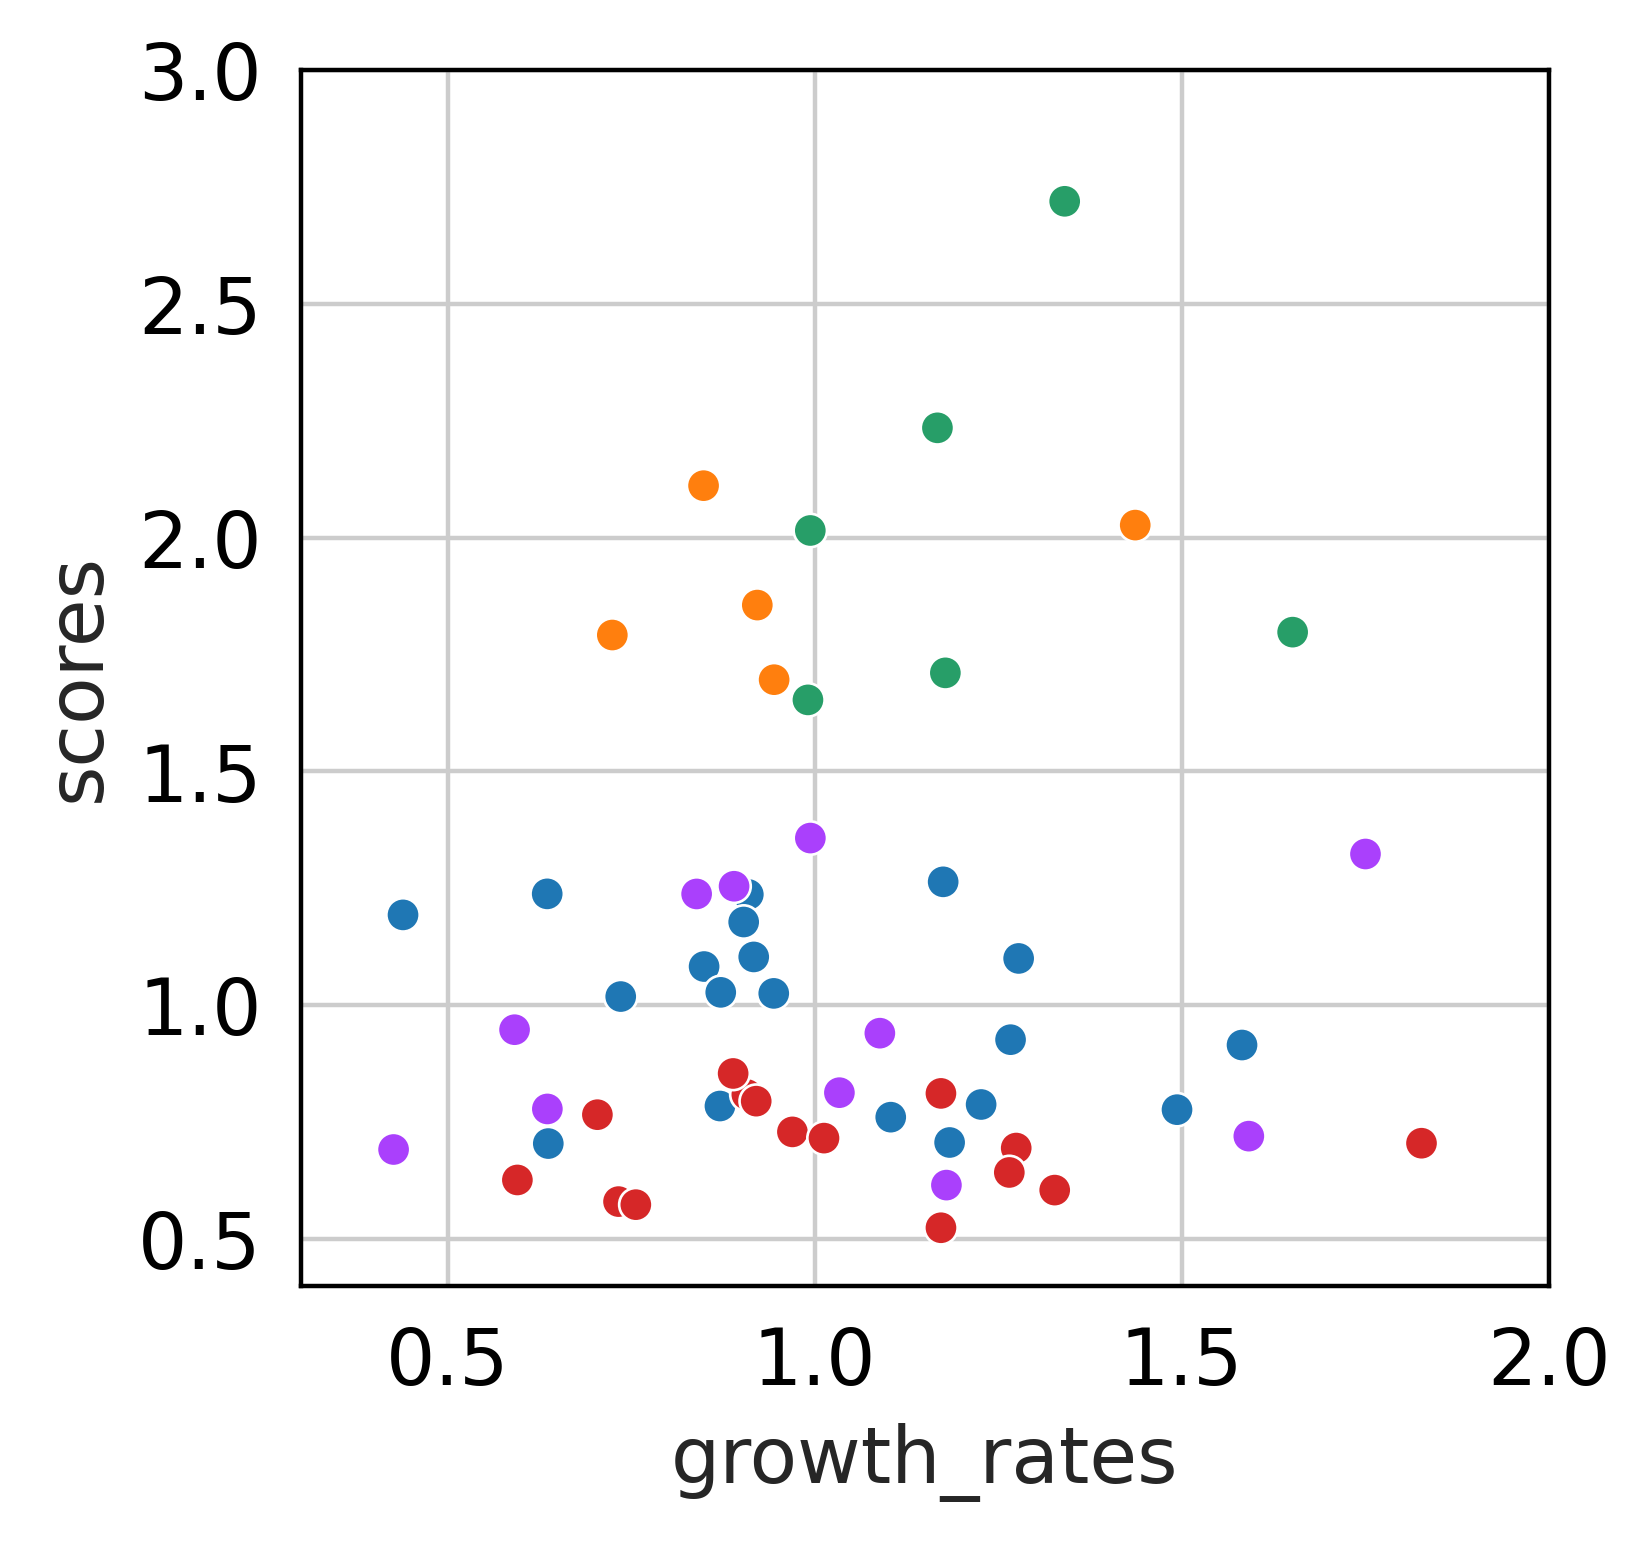

In [156]:
dfns=dft[dft['n']>200].copy()
ax = sns.scatterplot(data=dfns, x='growth_rates', y='scores', hue='cell_sets')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
print(scipy.stats.pearsonr(dfns['growth_rates'], dfns['scores']))
print(scipy.stats.spearmanr(dfns['growth_rates'], dfns['scores']))
plt.xlim(0.3,2)
plt.legend([],[], frameon=False)
plt.ylim(0.4,3)

# Pick a single time pair where it works well to illustrate the strategy

In [157]:
i=-6
day0=days[i]
day1=days[i+1]

15.5
PearsonRResult(statistic=0.8142801338221015, pvalue=0.09335484606105021)
SignificanceResult(statistic=0.6, pvalue=0.28475697986529375)


/tmp/ipykernel_23173/710415661.py:6: UserWarning: The palette list has more values (20) than needed (5), which may not be intended.
  ax = sns.scatterplot(data=dfm, x='growth_rates', y='scores', hue='cell_sets', palette=palette, s=60 )


(0.4, 3.0)

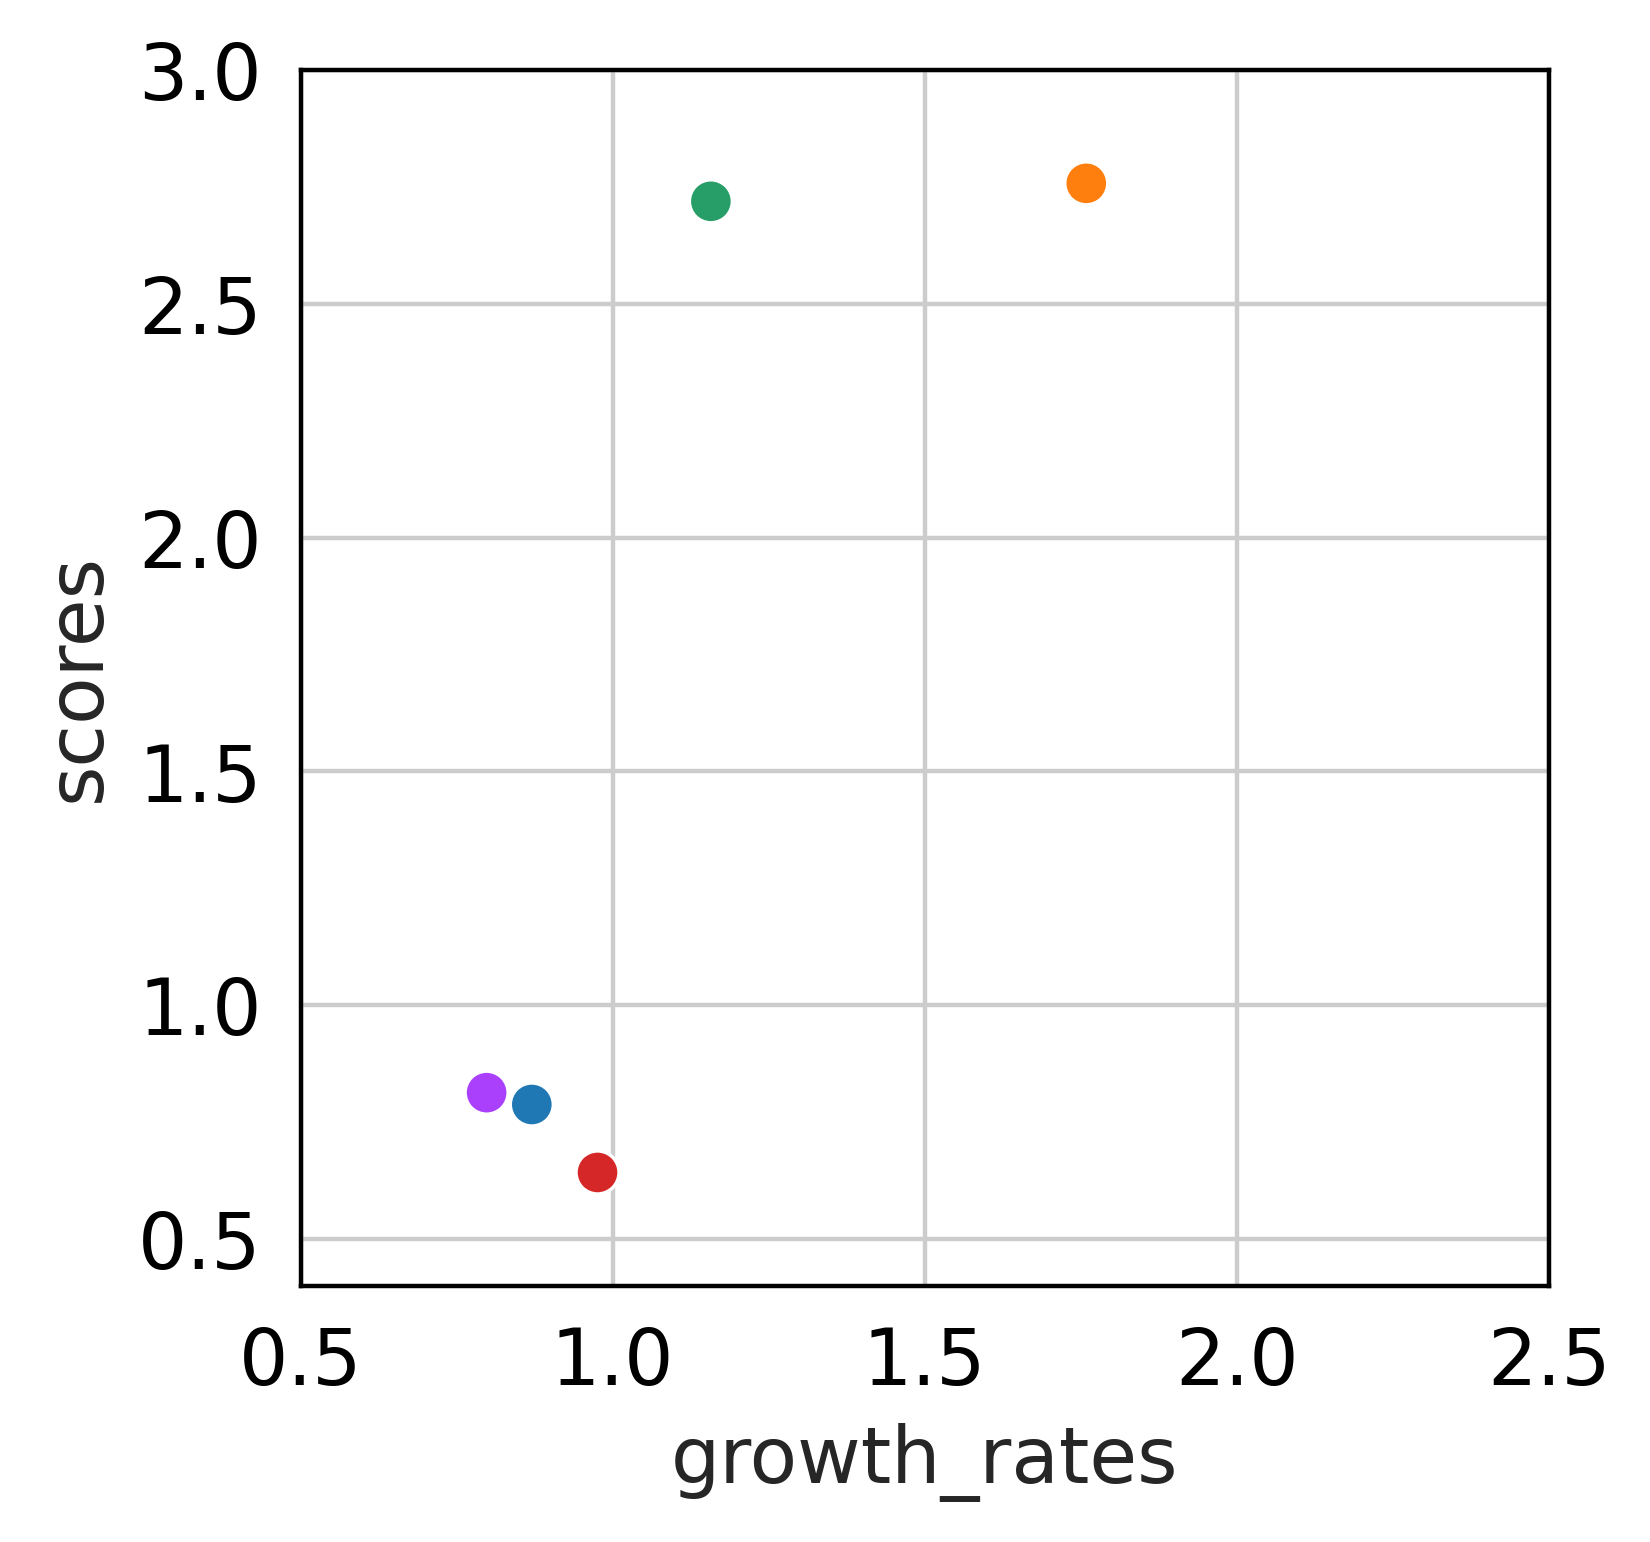

In [158]:
method='moscot'
print(day0)
dfm=accumulate_growth_rates_for_each_cell_set(frames1[i], method)
dfm['cell_sets']=dfm.index
dfm.index=range(len(dfm))
ax = sns.scatterplot(data=dfm, x='growth_rates', y='scores', hue='cell_sets', palette=palette, s=60 )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

print(scipy.stats.pearsonr(dfm['growth_rates'], dfm['scores']))
print(scipy.stats.spearmanr(dfm['growth_rates'], dfm['scores']))
plt.legend([],[], frameon=False)
plt.xlim(0.5,2.5)
plt.ylim(0.4,3)

15.5
PearsonRResult(statistic=0.7062104028076148, pvalue=0.1824976489846241)
SignificanceResult(statistic=0.6, pvalue=0.28475697986529375)


/tmp/ipykernel_23173/1555881226.py:6: UserWarning: The palette list has more values (20) than needed (5), which may not be intended.
  ax = sns.scatterplot(data=dfm, x='growth_rates', y='scores', hue='cell_sets', palette=palette, s=60)


(0.4, 3.0)

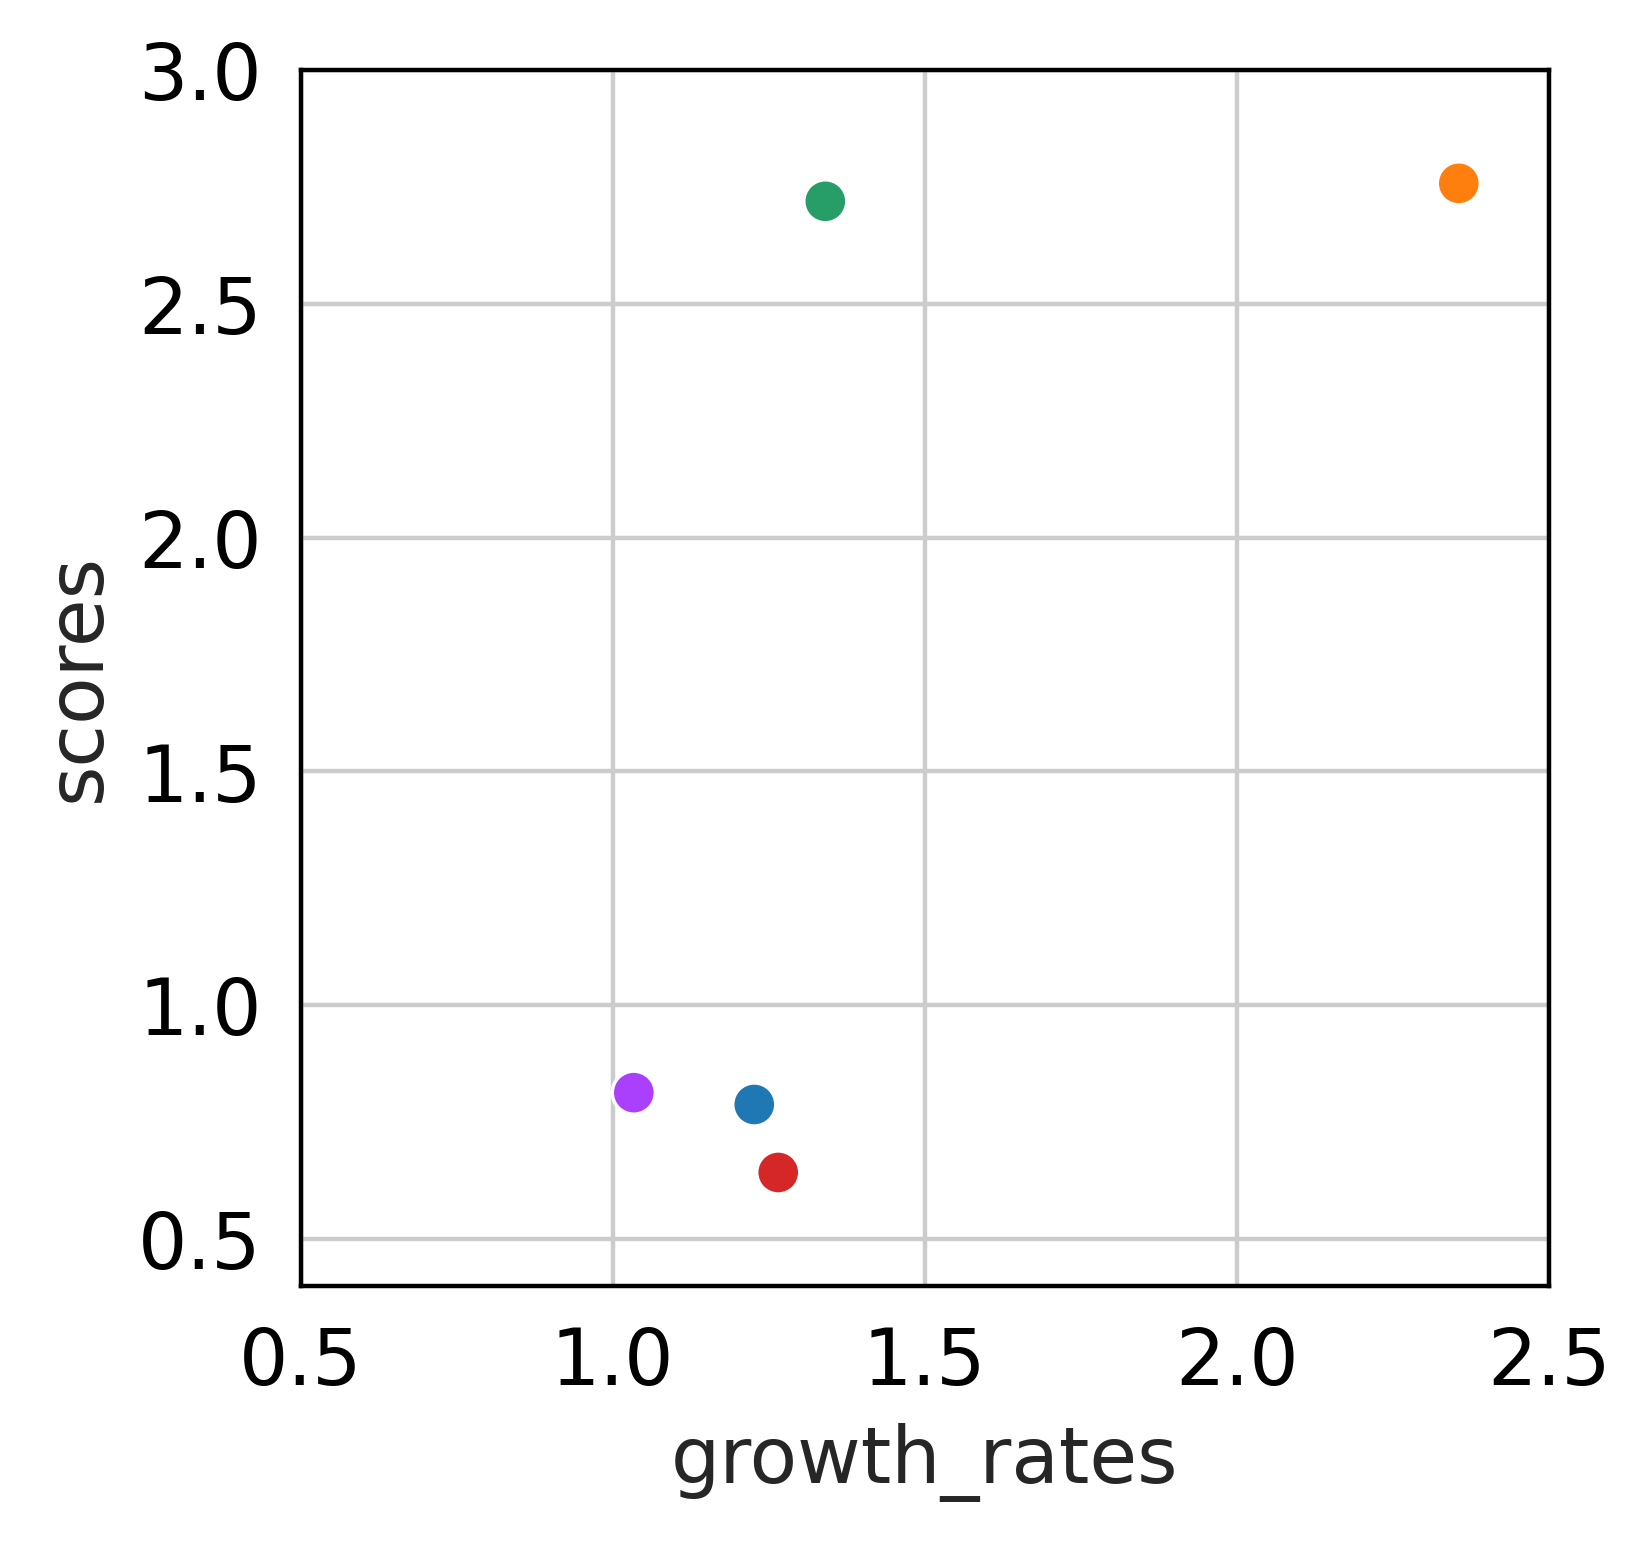

In [160]:
method='TOME'
print(day0)
dfm=accumulate_growth_rates_for_each_cell_set(frames1[i], method)
dfm['cell_sets']=dfm.index
dfm.index=range(len(dfm))
ax = sns.scatterplot(data=dfm, x='growth_rates', y='scores', hue='cell_sets', palette=palette, s=60)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

print(scipy.stats.pearsonr(dfm['growth_rates'], dfm['scores']))
print(scipy.stats.spearmanr(dfm['growth_rates'], dfm['scores']))
plt.legend([],[], frameon=False)
plt.xlim(0.5,2.5)
plt.ylim(0.4,3)

# And some PCAs plots

In [74]:
adatas=adata[adata.obs['day'].isin([day0, day1])].copy()

In [75]:
sc.pp.pca(adatas, use_highly_variable=True)

In [76]:
adatas.obs['day']=adatas.obs['day'].astype('category')

In [77]:
adatas.obsm['X_pca_']=adatas.obsm['X_pca'][:,:2]

In [326]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 12)

/tmp/ipykernel_26845/486966782.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 12)


In [92]:
flare=sns.color_palette("flare", as_cmap=True)
n=39
cat_colorset=[]
for j in range(n):
    cat_colorset.append(flare(int(j/n*255)))

In [117]:
cat_colorset=list(reversed(cat_colorset))

/home/mgander/jax_test/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


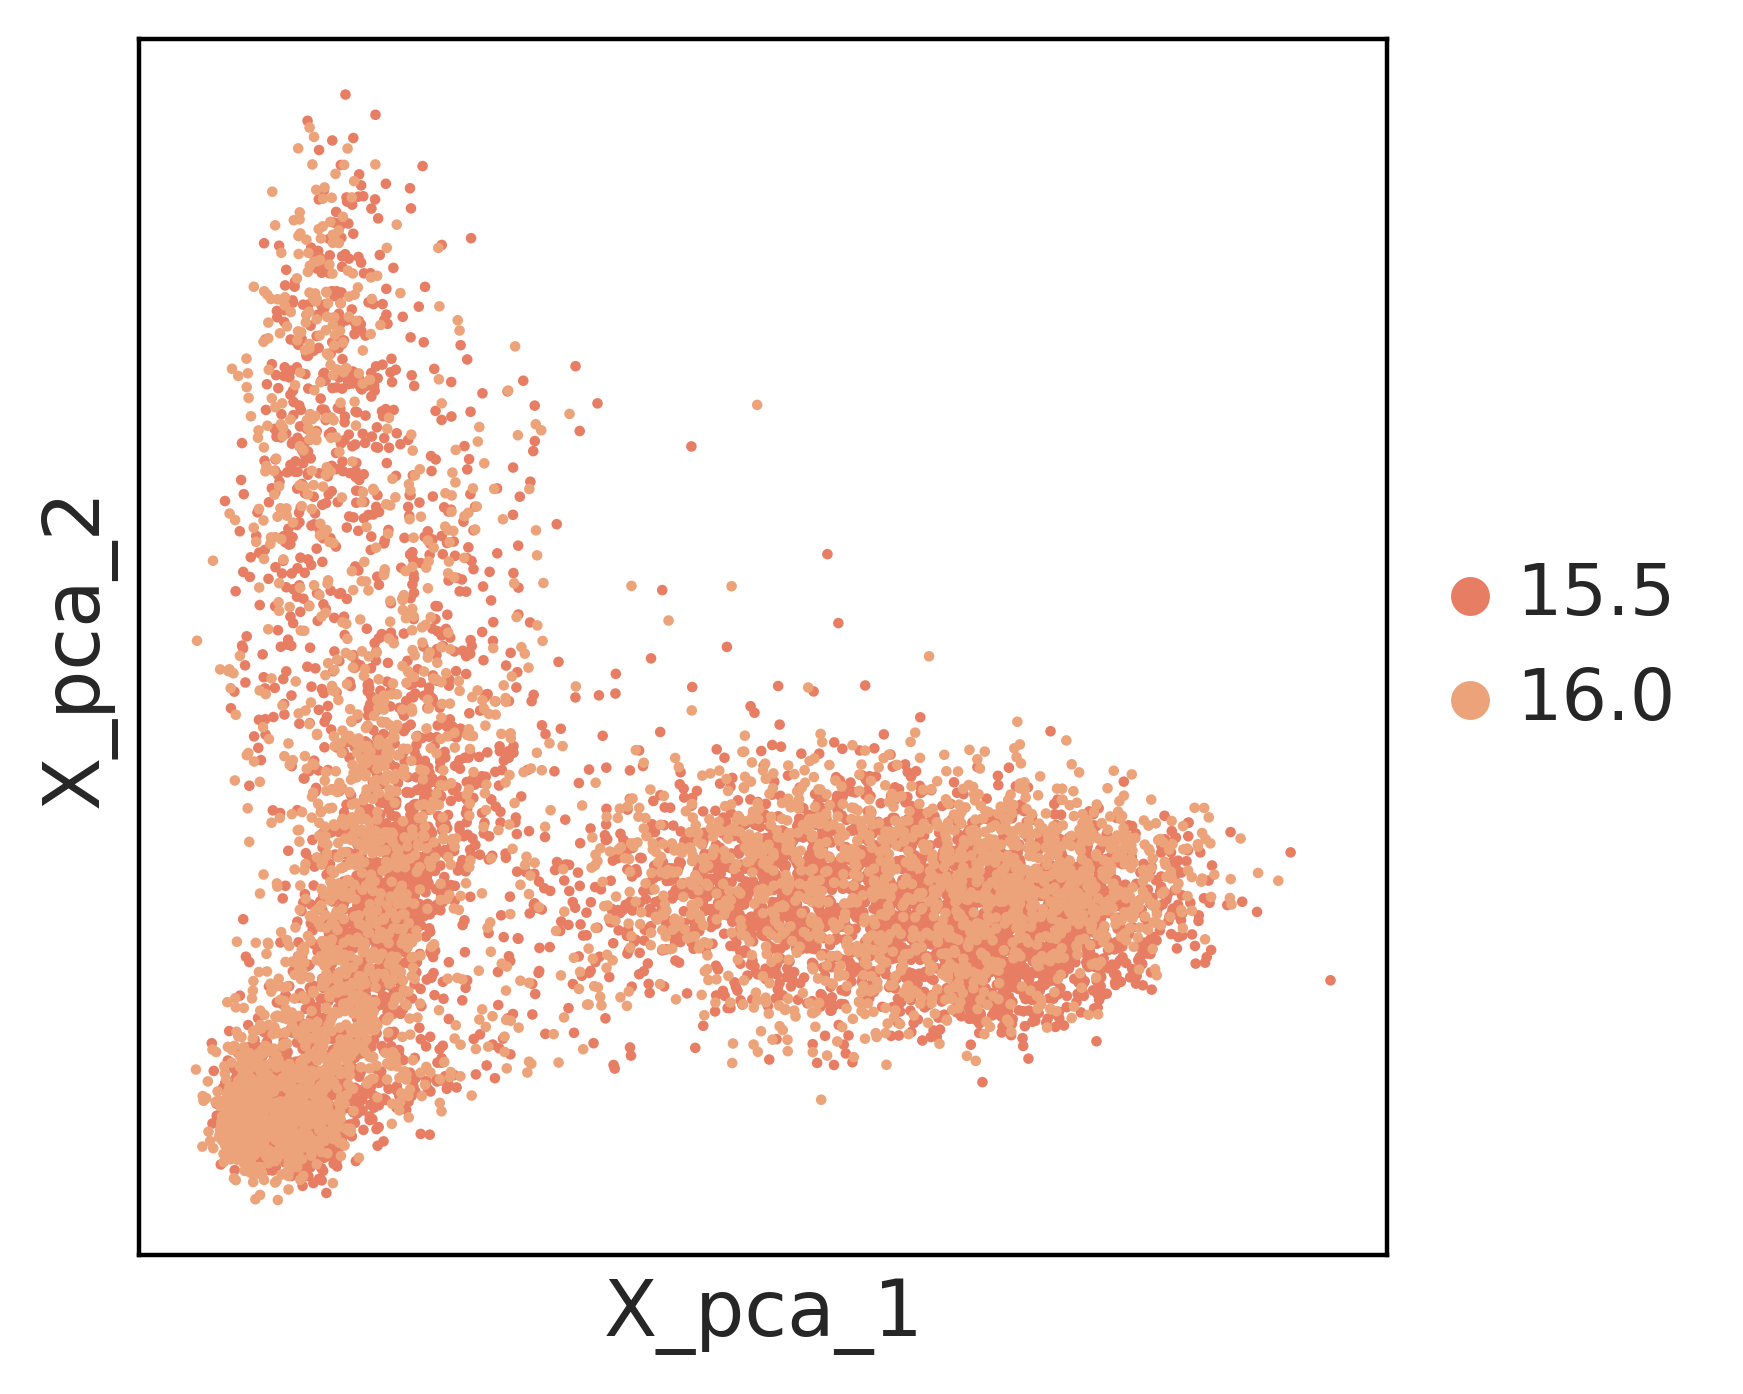

In [119]:
sc.pl.embedding(adatas, basis='X_pca_', color='day', palette=[cat_colorset[i-3], cat_colorset[i+3]], 
               title='')

/home/mgander/jax_test/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


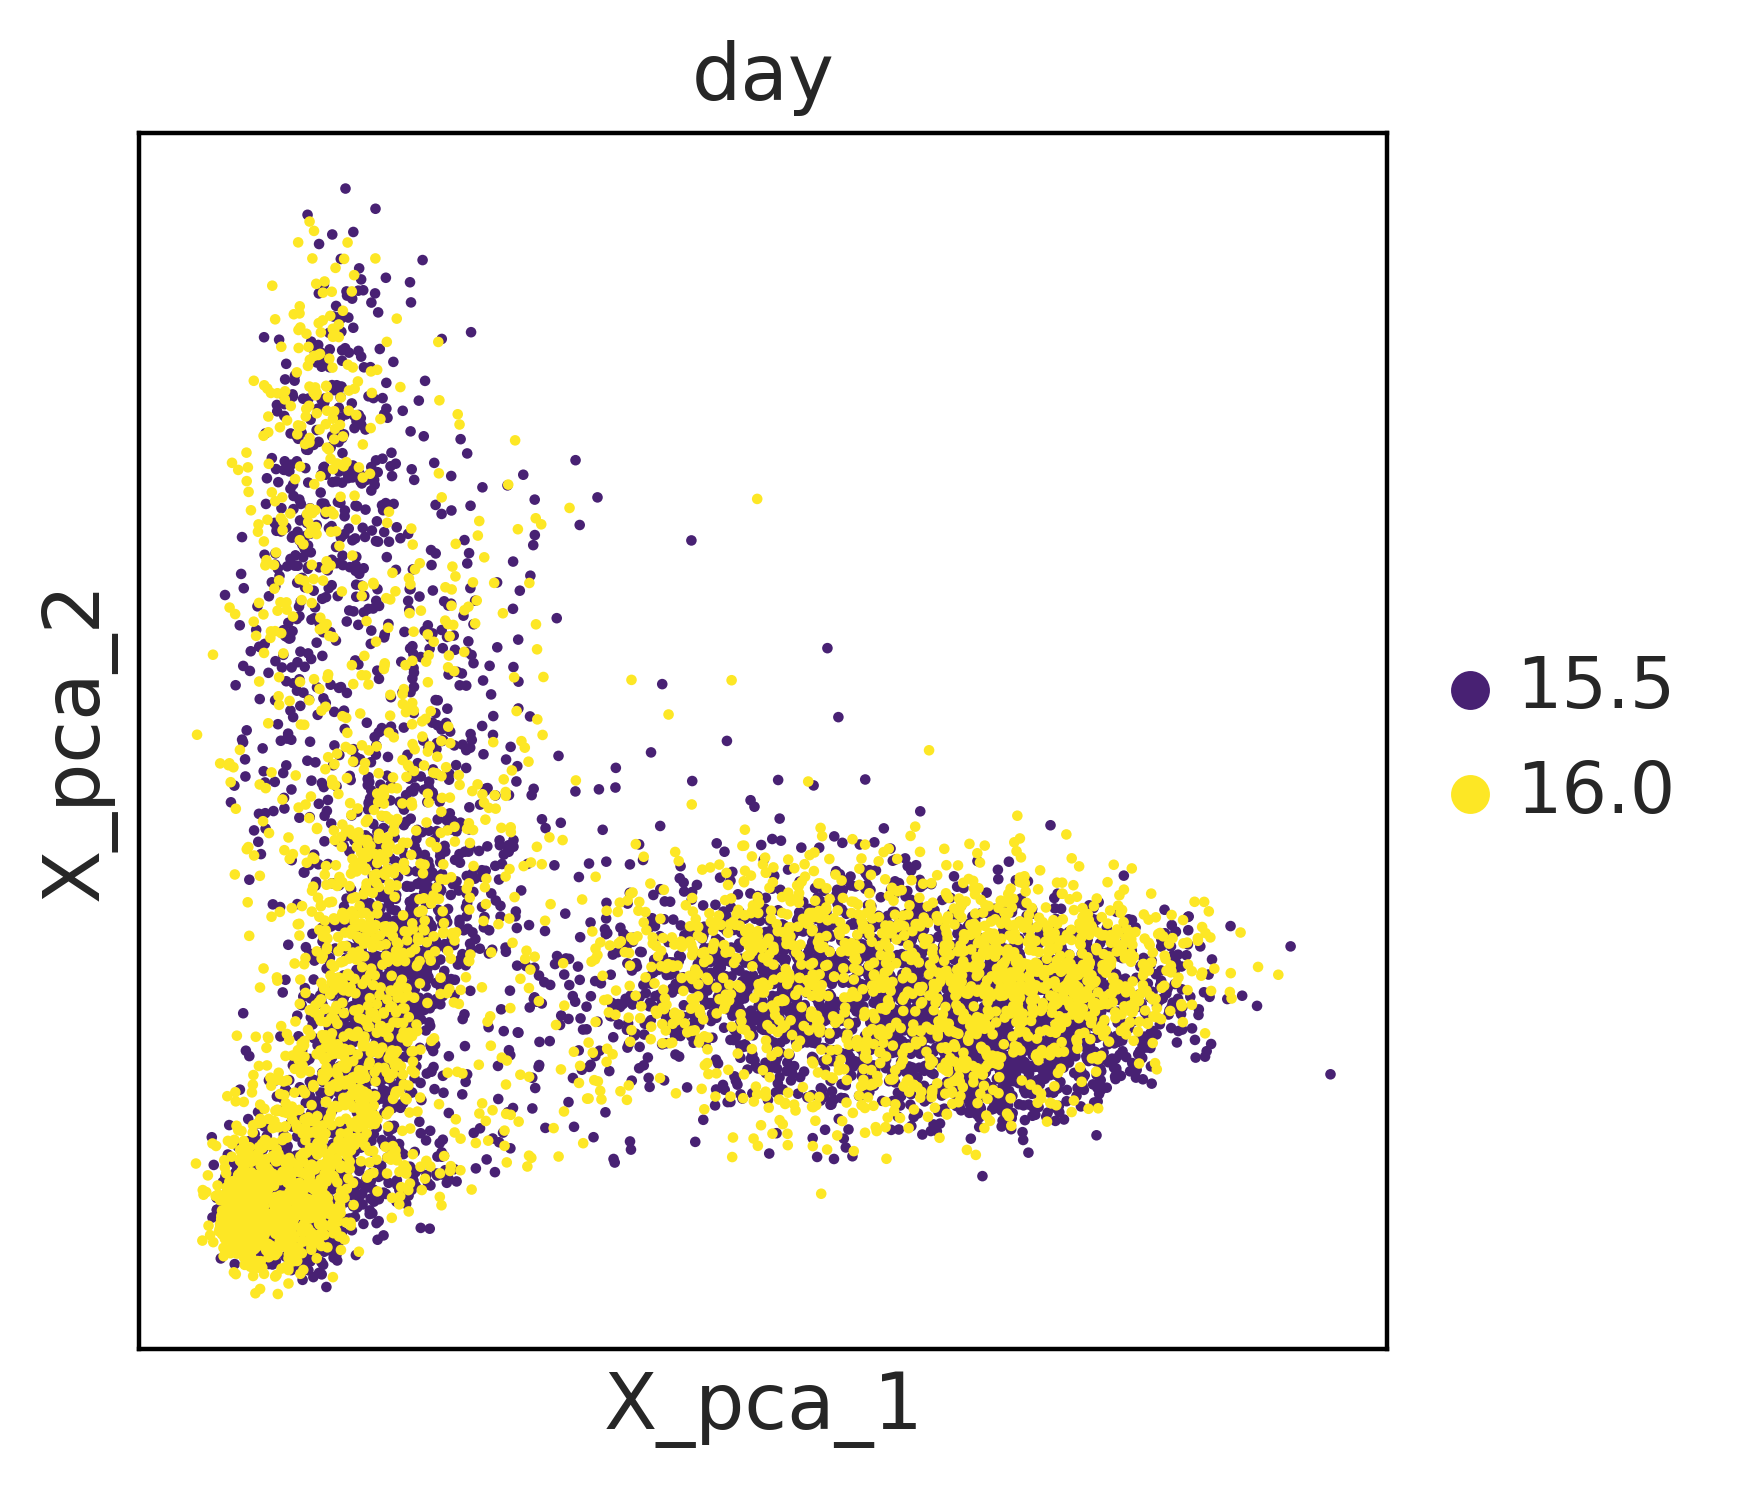

In [362]:
# For the legend
sc.pl.embedding(adatas, basis='X_pca_', color='day', palette=[viridis(1), viridis(100)])

/home/mgander/jax_test/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


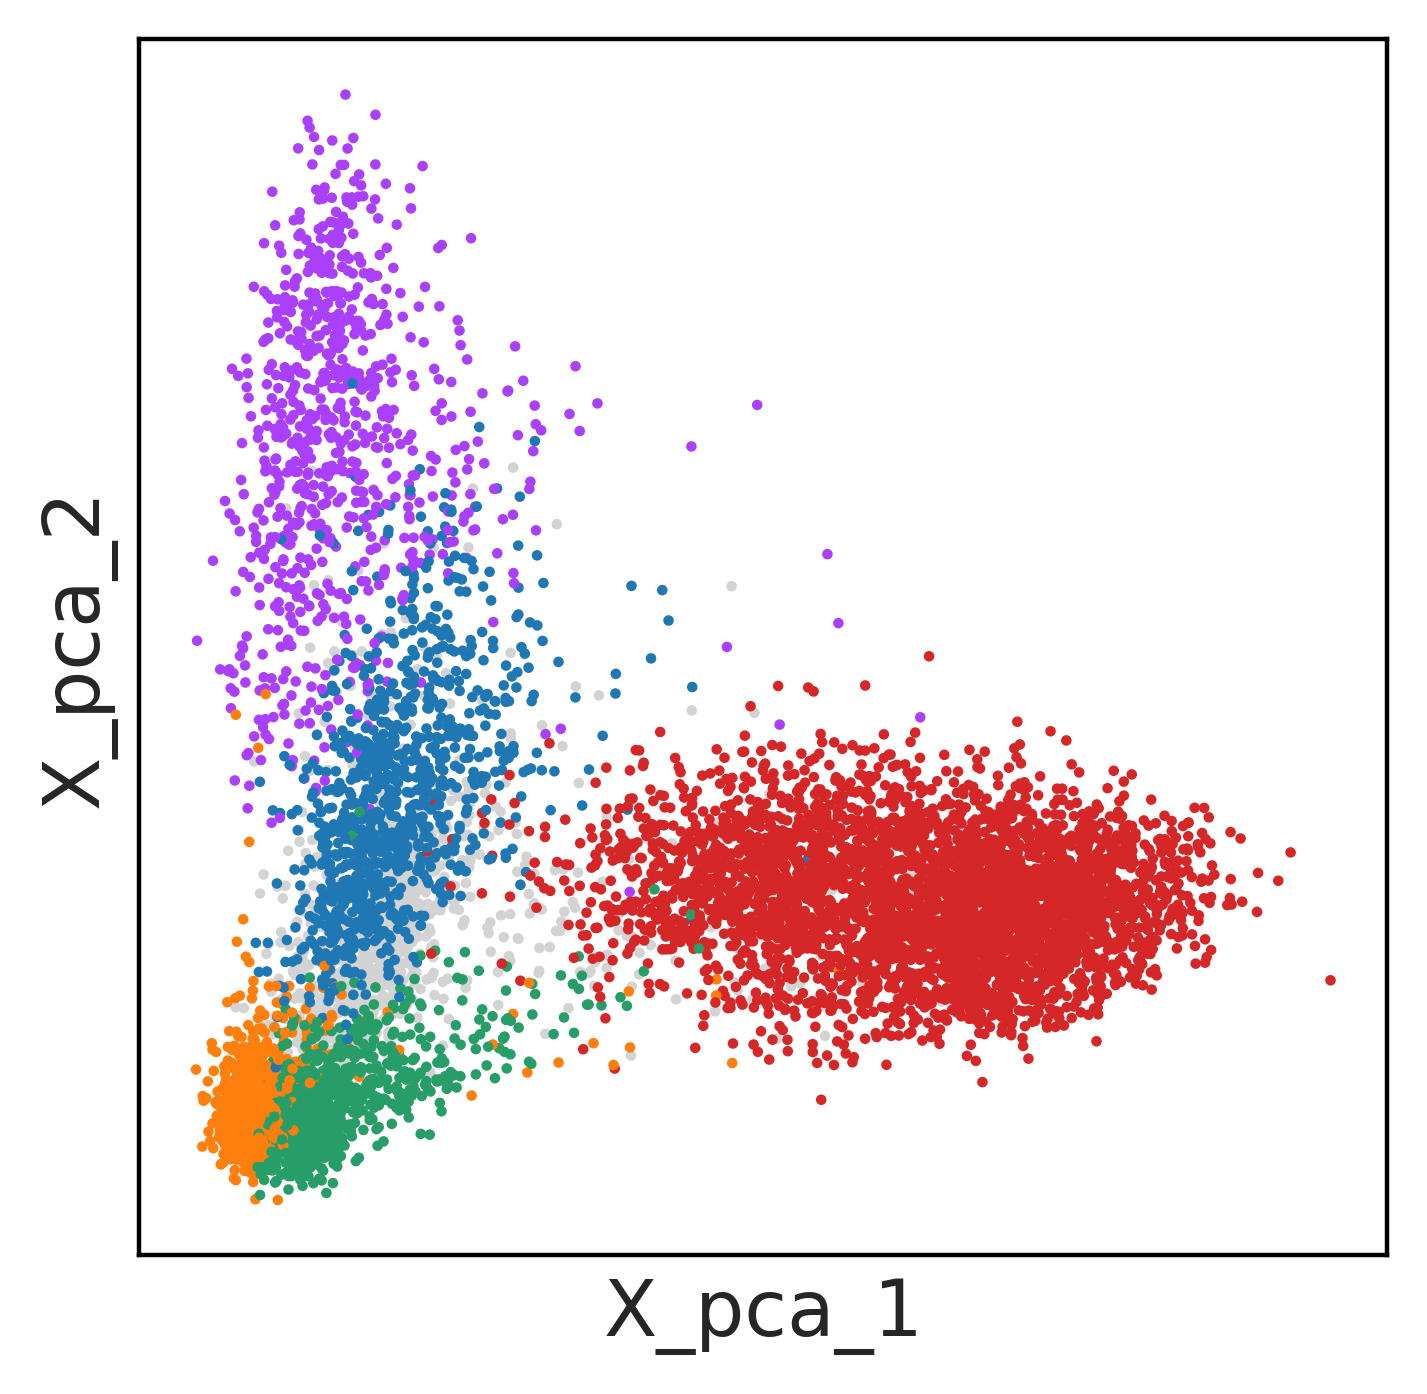

In [343]:
sc.pl.embedding(adatas, basis='X_pca_', color='major_cell_sets', palette=palette, title='', legend_loc=None)

In [344]:
adatass=adatas[adatas.obs['day']==day0].copy()

In [345]:
adatass.obs['scores']=0
adatass.obs['scores'].loc[frames1[i+1].index]=frames1[i+1]['scores']

/tmp/ipykernel_26845/3271683050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatass.obs['scores'].loc[frames1[i+1].index]=frames1[i+1]['scores']


In [346]:
method='moscot'
adatass.obs[f'{method}_growth_rates']=0
adatass.obs[f'{method}_growth_rates'].loc[frames1[i+1].index]=frames1[i+1][f'{method}_growth_rates']


method='TOME'
adatass.obs[f'{method}_growth_rates']=0
adatass.obs[f'{method}_growth_rates'].loc[frames1[i+1].index]=frames1[i+1][f'{method}_growth_rates']

/tmp/ipykernel_26845/1566905391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatass.obs[f'{method}_growth_rates'].loc[frames1[i+1].index]=frames1[i+1][f'{method}_growth_rates']
/tmp/ipykernel_26845/1566905391.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatass.obs[f'{method}_growth_rates'].loc[frames1[i+1].index]=frames1[i+1][f'{method}_growth_rates']


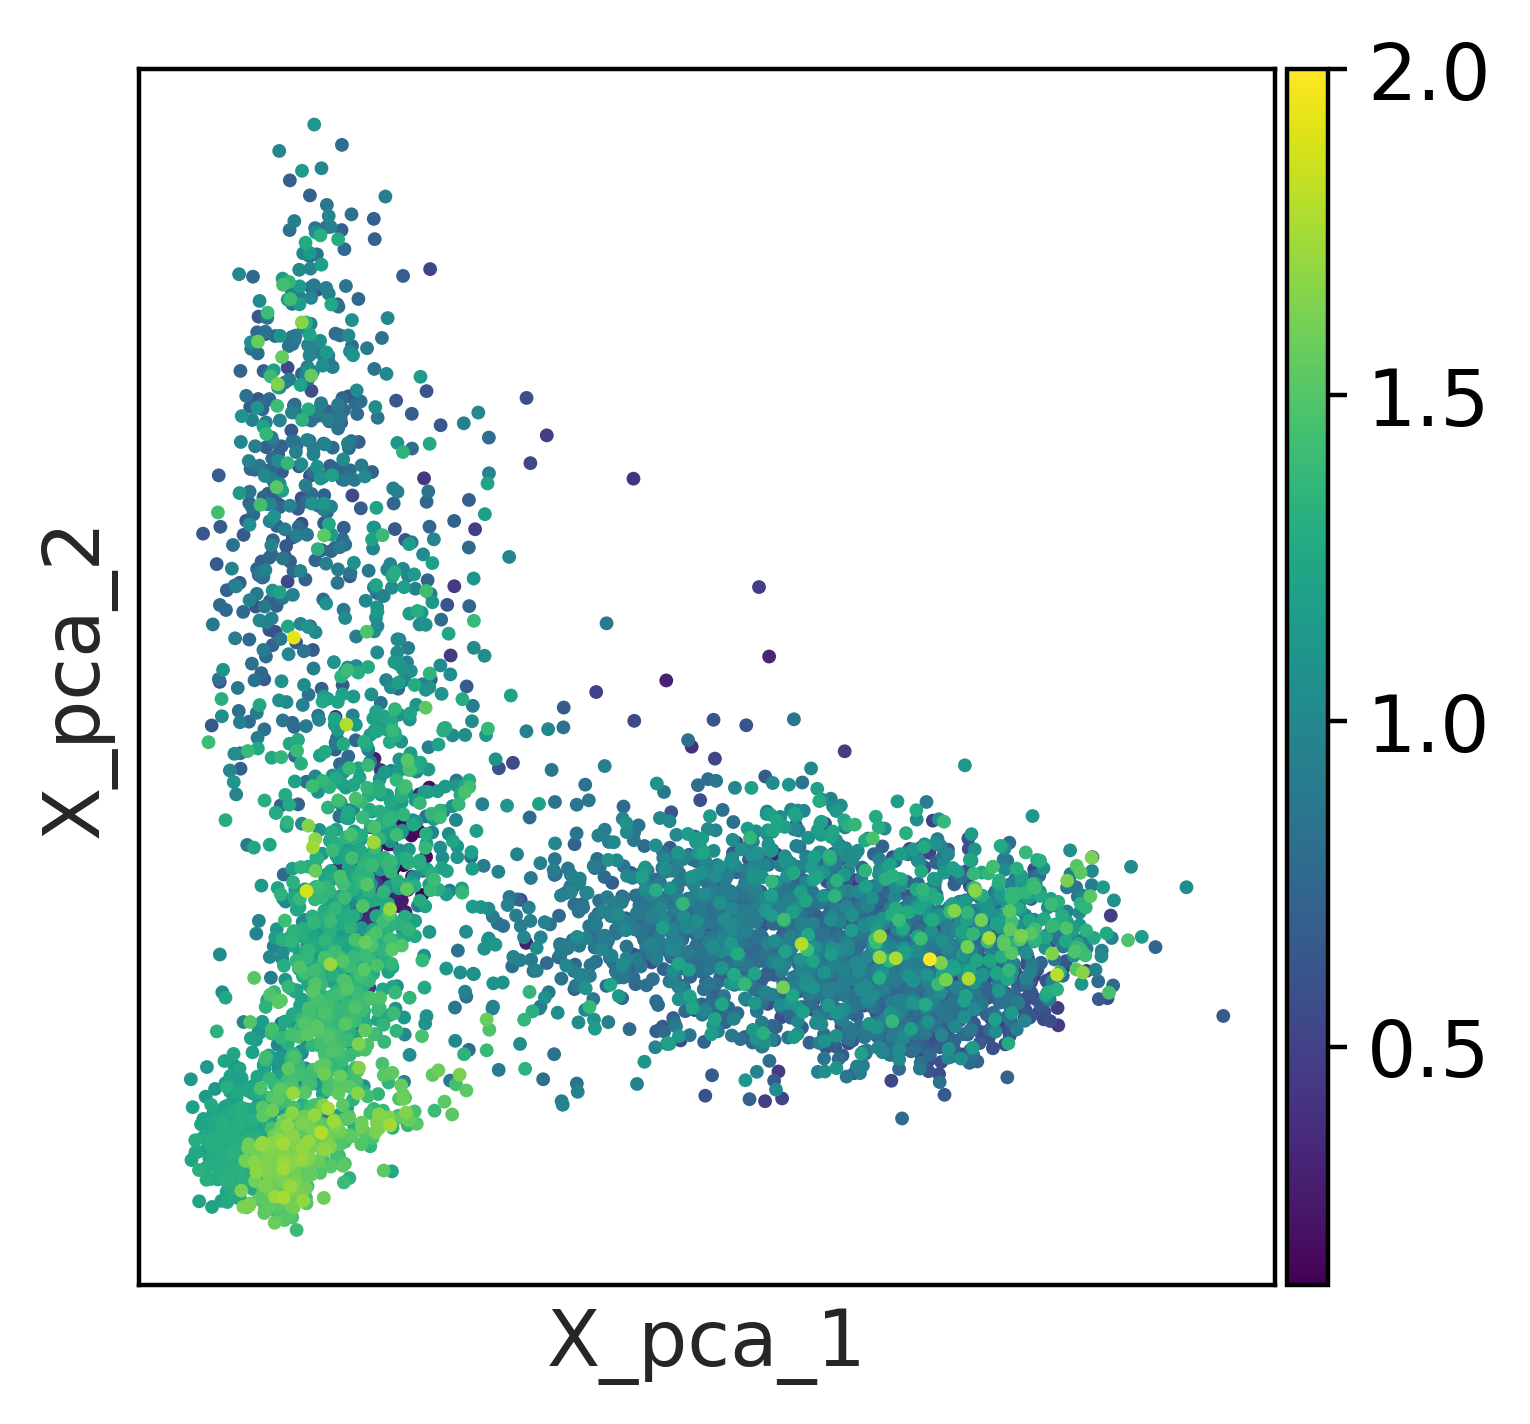

In [349]:
method='moscot'
sc.pl.embedding(adatass, basis='X_pca_', color=f'{method}_growth_rates', color_map='viridis', vmax=2, title='')

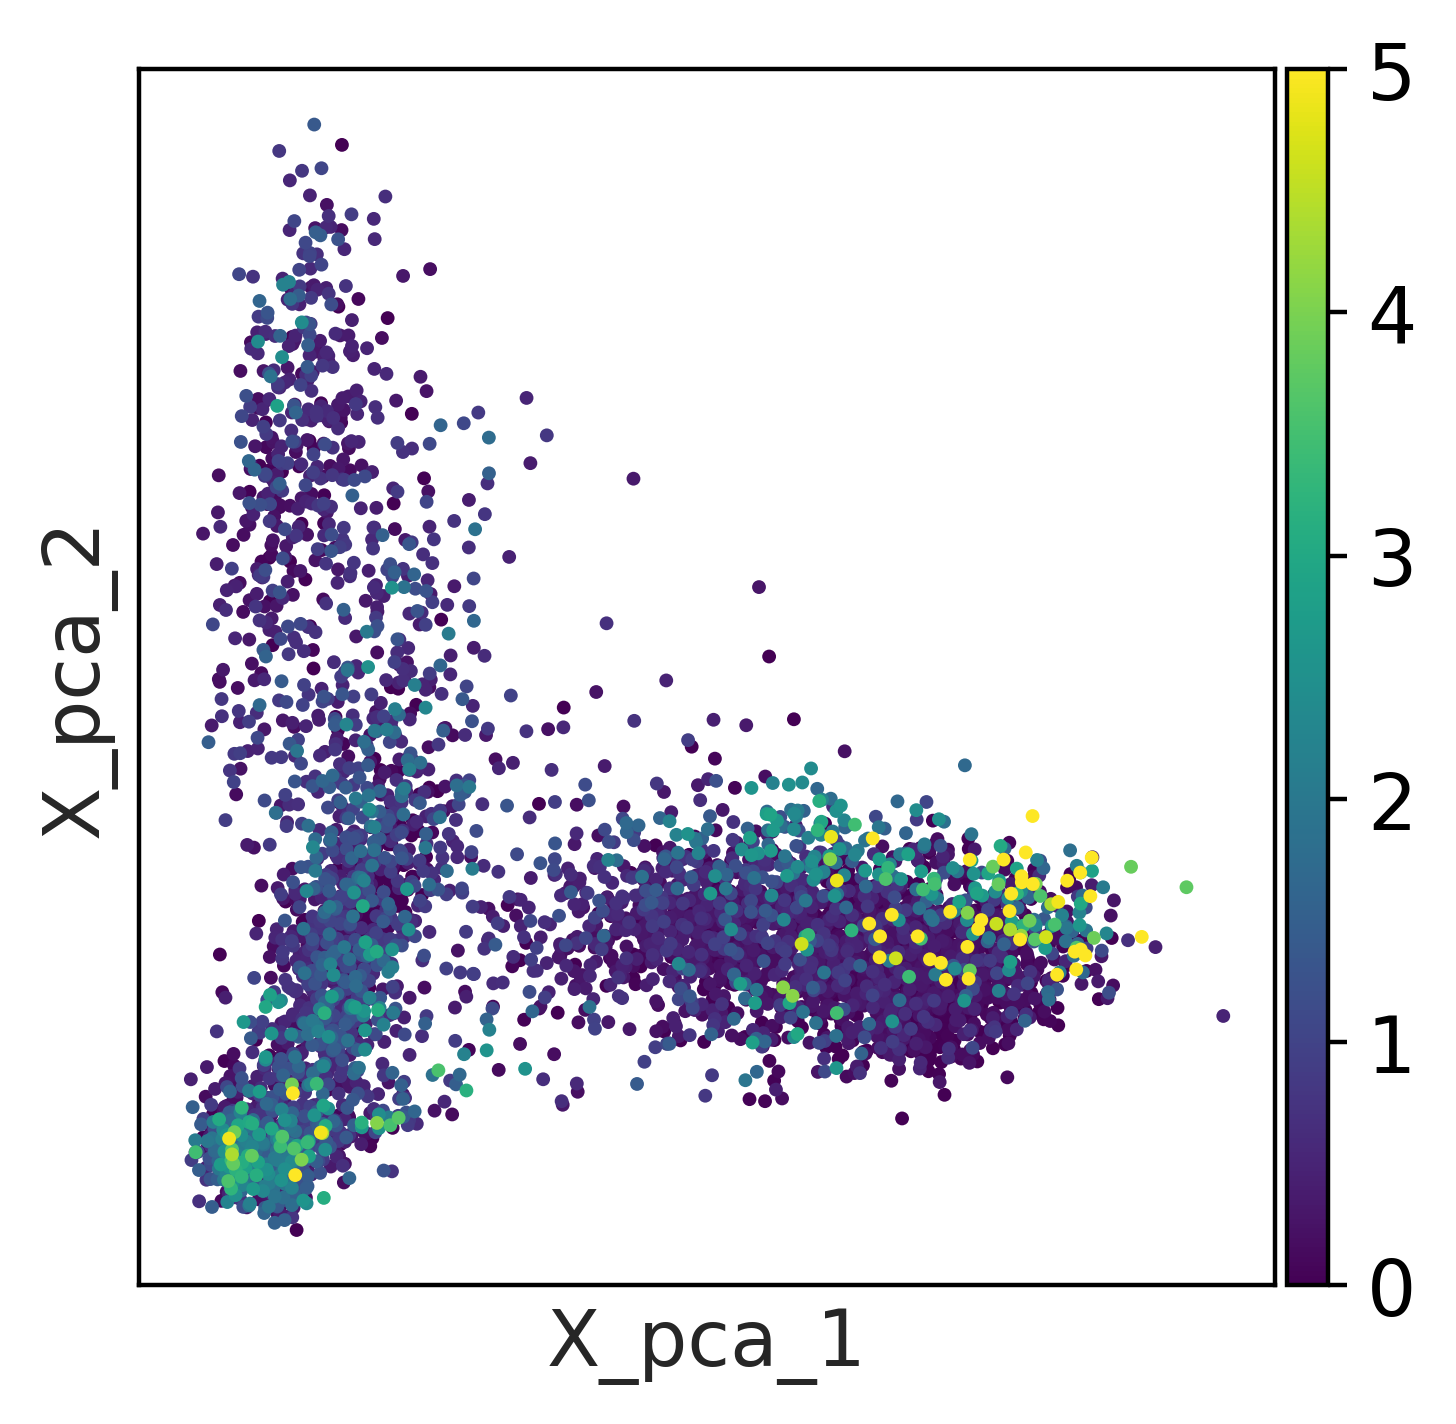

In [350]:
method='TOME'
sc.pl.embedding(adatass, basis='X_pca_', color=f'{method}_growth_rates', color_map='viridis', vmax=5, title='')

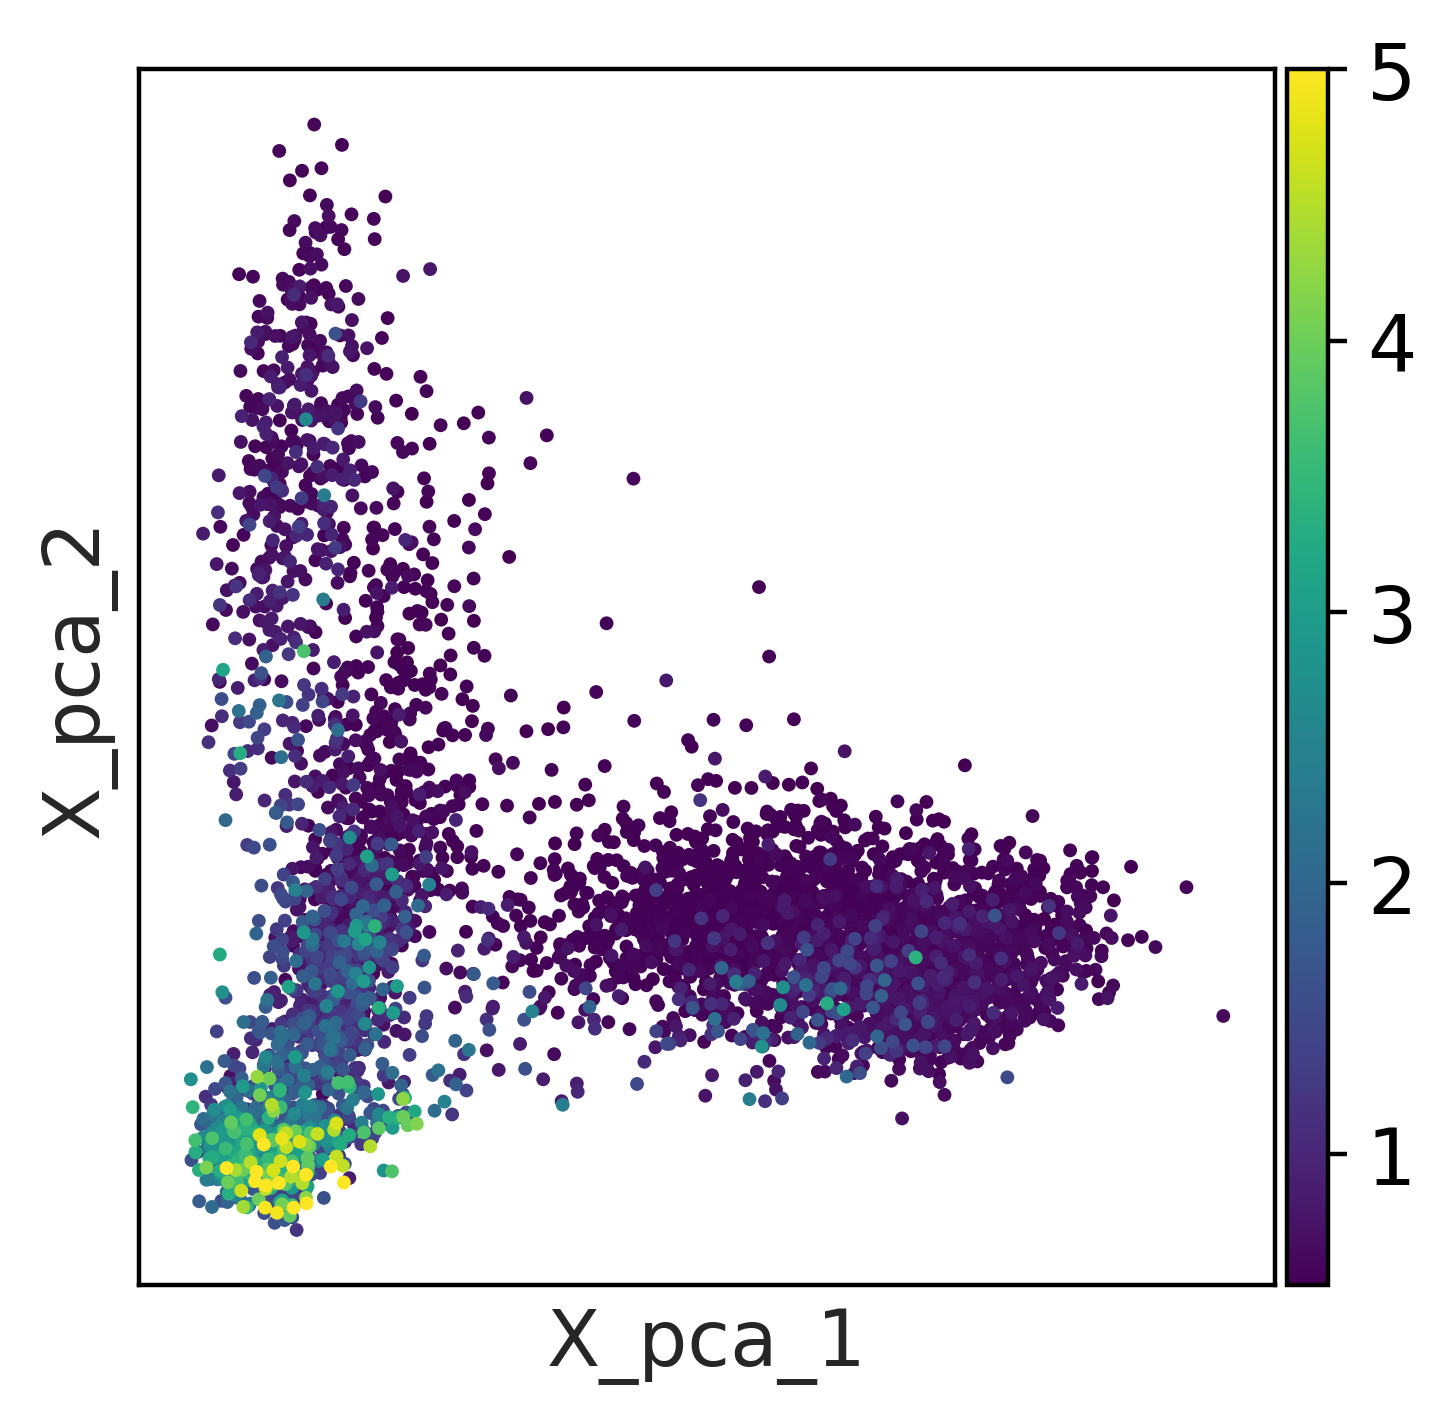

In [351]:
sc.pl.embedding(adatass, basis='X_pca_', color='scores', color_map='viridis', vmax=5, title='')

In [335]:
adatass.obs['cell_sets'].value_counts()

cell_sets
Stromal        2386
MEF/other       580
IPS             524
Epithelial      520
Trophoblast     470
Neural          371
Name: count, dtype: int64